In [1]:
from imagegrains import segmentation_helper, data_loader, plotting
import torch
import matplotlib.pyplot as plt

>> Initializing ImageGrains with Cellpose legacy release (v2).


## Download pre-trained models and demo data  
If you have not donwloaded the pre-trained models and demo data yet from github, please run the following cell to download them.

In [2]:
download_path = data_loader.download_files()

>> Downloading demo data to C:/Users/Mair/imagegrains ...


>> Downloading model weights to: C:/Users/Mair/imagegrains/models: 100%|██████████| 4/4 [00:14<00:00,  3.60s/file(s)]


## Check local GPU setup  
If you have a GPU, you can run the following cell to check if it is properly set up. Pleasse make sure to follow the instructions for correct installation in the [README](https://github.com/dmair1989/imagegrains#local-installation) to enable GPU support. If you work on a Mac you can try to install the Cellpose package with experimental M1 support (see [here](https://cellpose.readthedocs.io/en/latest/installation.html#m1-mac-installation)).

In [3]:
# List GPU devices and CUDA version
!nvidia-smi -L 
!nvcc --version
# Check GPU memory
!nvidia-smi -q -d Memory 

print(f"PyTorch version: {torch.__version__}")
print(f"GPU available for pytorch: {torch.cuda.is_available()}")

GPU 0: Quadro K620 (UUID: GPU-56f68e08-f805-3d86-6424-838f274f41a2)
nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Sep_21_10:41:10_Pacific_Daylight_Time_2022
Cuda compilation tools, release 11.8, V11.8.89
Build cuda_11.8.r11.8/compiler.31833905_0
PyTorch version: 2.7.1+cpu
GPU available for pytorch: False

==============NVSMI LOG==============

Timestamp                                 : Thu Jul  3 11:26:30 2025
Driver Version                            : 522.06
CUDA Version                              : 11.8

Attached GPUs                             : 1
GPU 00000000:01:00.0
    FB Memory Usage
        Total                             : 2048 MiB
        Reserved                          : 40 MiB
        Used                              : 1206 MiB
        Free                              : 800 MiB
    BAR1 Memory Usage
        Total                             : 256 MiB
        Used                              : 1 MiB
        Free    

## Option A: Train model for a whole dataset (from scratch and from *nuclei*)
Here we train a model for a set of images (usually own data combined with the data from https://zenodo.org/records/8005771). Requirements for the data are:
1) Each image file (ideally in `.jpg` format) needs a label file (with teh same name as the image and `_mask` at the end of the filename; as `.tif` with the exact same extend and resolution as the image file) that holds the ground truth masks (each grain has to have an individual label).
2) The images and masks should be split into a `test` and `train` subfolder. The `data_path` should refer to the parent folder (please use a full path).

**Please note that for most applications, best results are obtained when training from the Cellpose *nuclei* model.**

In [4]:
# using the demo files
data_path = f'{download_path}/demo_data/FH/' 

# OR path to custom dataset (uncomment next line to use)
data_path = "F:/cellpose/fh/" 

### Find files

In [5]:
train_images,train_masks,test_images,test_masks = data_loader.find_data(data_path)
print('Number of images:',len(train_images),'/',len(test_images))

Number of images: 6 / 1


### (Optional) Ensure correct names

In [6]:
segmentation_helper.check_labels(train_masks);
segmentation_helper.check_labels(test_masks);
segmentation_helper.check_im_label_pairs(train_images,train_masks);
segmentation_helper.check_im_label_pairs(test_images,test_masks);

No files renamed.
No files renamed.
All images have labels.
All images have labels.


### (Optional) Visual data check

Training images/labels


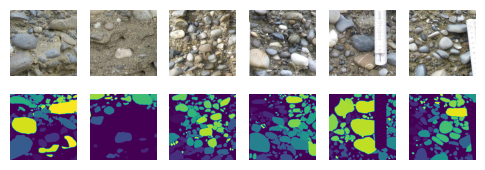

In [7]:
plt.figure(figsize=(len(train_images),2))
plotting.show_training_set(train_images)
print('Training images/labels')

Test images/labels


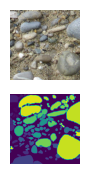

In [8]:
print('Test images/labels')
plt.figure(figsize=(len(test_images),2))
plotting.show_training_set(test_images)

### Start training
We will use `segmentation_helper.custom_train()`, for this you have the following inpus:  

`PATH` (str) - Path to the directory containing the images and labels  
`pretrained_model` (str(optional, default None)) - Path to the pretrained model. If not specified, the model is trained from scratch.  
`datstring` (str(optional, default None)) - File extension to be added to the model name.   
`return_model` (bool(optional, default False)) - If True, the model is returned  
`model_name` (str(optional, default None)) - Name of the model.  
`label_check` (bool(optional, default True)) - If True, the labels are checked for the correct format and the images and labels are checked for correct pairing. If the labels are not in the correct format, they are renamed to the correct format. If the images and labels are not paired correctly, a list of images for which the labels are missing is returned. 

#### Train a model from scratch

In [9]:
segmentation_helper.custom_train(data_path,  gpu=True,model_name='my_model_name',datstring='000815',nepochs = 500)

2025-07-03 11:26:32,140 [INFO] WRITING LOG OUTPUT TO C:\Users\Mair\.cellpose\run.log
2025-07-03 11:26:32,142 [INFO] 
cellpose version: 	2.3.2 
platform:       	win32 
python version: 	3.9.23 
torch version:  	2.7.1+cpu
No files renamed.
No files renamed.
All images have labels.
All images have labels.
2025-07-03 11:26:32,187 [INFO] TORCH CUDA version not installed/working.
2025-07-03 11:26:32,192 [INFO] >>>> using CPU
2025-07-03 11:26:32,395 [INFO] computing flows for labels


100%|██████████| 6/6 [00:05<00:00,  1.04it/s]

2025-07-03 11:26:38,286 [INFO] computing flows for labels



100%|██████████| 1/1 [00:01<00:00,  1.06s/it]


2025-07-03 11:26:41,613 [INFO] >>>> mean of training label mask diameters (saved to model) 20.347
2025-07-03 11:26:41,613 [INFO] >>>> training network with 2 channel input <<<<
2025-07-03 11:26:41,613 [INFO] >>>> LR: 0.20000, batch_size: 8, weight_decay: 0.00001
2025-07-03 11:26:41,629 [INFO] >>>> ntrain = 6, ntest = 1
2025-07-03 11:26:41,629 [INFO] >>>> nimg_per_epoch = 6
2025-07-03 11:26:47,201 [INFO] Epoch 0, Time  5.6s, Loss 4.0541, Loss Test 3.4456, LR 0.0000
2025-07-03 11:26:52,428 [INFO] saving network parameters to F:/cellpose/fh/models/my_model_name
2025-07-03 11:27:13,728 [INFO] Epoch 5, Time 32.1s, Loss 3.5050, Loss Test 3.6157, LR 0.1111
2025-07-03 11:27:40,281 [INFO] Epoch 10, Time 58.7s, Loss 3.4521, Loss Test 13.9661, LR 0.2000
2025-07-03 11:28:31,425 [INFO] Epoch 20, Time 109.8s, Loss 3.2470, Loss Test 358713.1562, LR 0.2000
2025-07-03 11:29:25,315 [INFO] Epoch 30, Time 163.7s, Loss 3.1488, Loss Test 26.8124, LR 0.2000
2025-07-03 11:30:15,935 [INFO] Epoch 40, Time 214.3

#### Train a model from *nuclei*

In [10]:
segmentation_helper.custom_train(data_path,  gpu=True,model_name='my_model_name',pretrained_model='nuclei',datstring='000815',nepochs = 500)

creating new log file
2025-07-03 11:31:15,784 [INFO] WRITING LOG OUTPUT TO C:\Users\Mair\.cellpose\run.log
2025-07-03 11:31:15,785 [INFO] 
cellpose version: 	2.3.2 
platform:       	win32 
python version: 	3.9.23 
torch version:  	2.7.1+cpu
No files renamed.
No files renamed.
All images have labels.
All images have labels.
2025-07-03 11:31:15,822 [WARNING] pretrained model has incorrect path
2025-07-03 11:31:15,822 [INFO] >> cyto << model set to be used
2025-07-03 11:31:15,825 [INFO] TORCH CUDA version not installed/working.
2025-07-03 11:31:15,828 [INFO] >>>> using CPU
2025-07-03 11:31:16,246 [INFO] >>>> model diam_mean =  30.000 (ROIs rescaled to this size during training)
2025-07-03 11:31:16,246 [INFO] >> nuclei << model set to be used
2025-07-03 11:31:16,249 [INFO] TORCH CUDA version not installed/working.
2025-07-03 11:31:16,252 [INFO] >>>> using CPU
2025-07-03 11:31:16,559 [INFO] >>>> model diam_mean =  17.000 (ROIs rescaled to this size during training)
2025-07-03 11:31:16,713 [

100%|██████████| 6/6 [00:05<00:00,  1.11it/s]

2025-07-03 11:31:22,198 [INFO] computing flows for labels



100%|██████████| 1/1 [00:01<00:00,  1.11s/it]

2025-07-03 11:31:23,338 [INFO] >>>> mean of training label mask diameters (saved to model) 20.347
2025-07-03 11:31:23,339 [INFO] >>>> training network with 2 channel input <<<<
2025-07-03 11:31:23,339 [INFO] >>>> LR: 0.20000, batch_size: 8, weight_decay: 0.00001
2025-07-03 11:31:23,340 [INFO] >>>> ntrain = 6, ntest = 1
2025-07-03 11:31:23,342 [INFO] >>>> nimg_per_epoch = 6


2025-07-03 11:31:28,575 [INFO] Epoch 0, Time  5.2s, Loss 7.1555, Loss Test 6.5934, LR 0.0000
Training interrupted.


## Option B: Train a specialist model from a pretrained model  
Here we re-train an existing model for a set of images. Same requirements apply as for the approach above. **However, here should only be new images present in the `train` and `test` folders!**

In [11]:
data_path2 = "F:/cellpose/fh/" # path to dataset

### Find files

In [12]:
train_images,train_masks,test_images,test_masks = data_loader.find_data(data_path2)
print('Number of images:',len(train_images),'/',len(test_images))

Number of images: 6 / 1


### Start training

In [13]:
segmentation_helper.custom_train(data_path2, pretrained_model='F:/IG2/models/IG1_full_set_1.170223', gpu=True,model_name='my_model_name2',datstring='000815',nepochs = 500)

creating new log file
2025-07-03 11:31:39,552 [INFO] WRITING LOG OUTPUT TO C:\Users\Mair\.cellpose\run.log
2025-07-03 11:31:39,553 [INFO] 
cellpose version: 	2.3.2 
platform:       	win32 
python version: 	3.9.23 
torch version:  	2.7.1+cpu
No files renamed.
No files renamed.
All images have labels.
All images have labels.
2025-07-03 11:31:39,586 [WARNING] pretrained model has incorrect path
2025-07-03 11:31:39,587 [INFO] >> cyto << model set to be used
2025-07-03 11:31:39,589 [INFO] TORCH CUDA version not installed/working.
2025-07-03 11:31:39,591 [INFO] >>>> using CPU
2025-07-03 11:31:39,878 [INFO] >>>> model diam_mean =  30.000 (ROIs rescaled to this size during training)
2025-07-03 11:31:40,017 [INFO] computing flows for labels


100%|██████████| 6/6 [00:05<00:00,  1.11it/s]

2025-07-03 11:31:45,526 [INFO] computing flows for labels



100%|██████████| 1/1 [00:01<00:00,  1.04s/it]

2025-07-03 11:31:46,605 [INFO] >>>> mean of training label mask diameters (saved to model) 20.347
2025-07-03 11:31:46,607 [INFO] >>>> training network with 2 channel input <<<<
2025-07-03 11:31:46,609 [INFO] >>>> LR: 0.20000, batch_size: 8, weight_decay: 0.00001
2025-07-03 11:31:46,609 [INFO] >>>> ntrain = 6, ntest = 1
2025-07-03 11:31:46,609 [INFO] >>>> nimg_per_epoch = 6


2025-07-03 11:31:51,724 [INFO] Epoch 0, Time  5.1s, Loss 4.1227, Loss Test 2.0221, LR 0.0000
Training interrupted.


## Option C: Console training  

You can either train the model in the console or in the notebook. For console training you can simply copy the `train_str` (i.e., the outpt of the next cell) and paste it into the console. Make sure you are in an `imagegrains` or `cellpose` conda environment. Alternatively, you can run the after the next ( `!{train_str}` ) the model in the notebook via the console.

Details on training options can be found here:  
https://cellpose.readthedocs.io/en/latest/train.html   
https://cellpose.readthedocs.io/en/latest/api.html#cellpose.models.CellposeModel.train


In [14]:
model_path = "F:/demo/fh_boosted_1.170223" #or 'nuclei'

train_path = "F:/demo/train/"
test_path = "F:/demo/test/"

mask_filter = '_mask'

train_str = f'python -m cellpose --use_gpu --verbose --train --dir {train_path} --test_dir {test_path} --pretrained_model {model_path} --mask_filter {mask_filter}'
print(train_str)

python -m cellpose --use_gpu --verbose --train --dir F:/demo/train/ --test_dir F:/demo/test/ --pretrained_model F:/demo/fh_boosted_1.170223 --mask_filter _mask


In [ ]:
#train via console
#!{train_str}

## Option D: Full customization via default Cellpose training
#### (not recommended unless *really* needed)   
For more options you can use the default training for cellpose (not recommended). Here you can use all of the `CellposeModel.train()` parameters:   
https://cellpose.readthedocs.io/en/latest/api.html#cellpose.models.CellposeModel.train 

In [15]:
from cellpose import models, io

#The Cellpose model needs the images pre-loaded. 
train_data,train_labels,test_data,test_labels = [],[],[],[]
for x1,y1 in zip(train_images,train_masks):
    train_data.append(io.imread(str(x1)))
    train_labels.append(io.imread(str(y1)))

for x2,y2 in zip(test_images,test_masks):
    test_data.append(io.imread(str(x2)))
    test_labels.append(io.imread(str(y2)))

#create model object
model = models.CellposeModel(gpu=True,pretrained_model=None)
#train (uncomment next lines to use)
#model.train(train_data,train_labels,train_images,test_data,test_labels,test_images,channels=[0,0], #mandatory input
#            n_epochs=500,save_path=data_path)

2025-07-03 11:31:58,585 [INFO] TORCH CUDA version not installed/working.
2025-07-03 11:31:58,586 [INFO] >>>> using CPU
